In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_excel(r'C:\Users\aydar\Downloads\Задание прогноз.xlsx')

In [3]:
df

,week_start,week_end,dialing_fact,avg_wait_time_fact,calls_plan,calls_fact,chats_plan,chats_fact,chatbot_plan,chatbot_fact,people_ottok_fact_fl,people_plan_fl,sr_plan,sr_fact,people_back_fact,people_back_plan
0,2020-03-02 00:00:00,2020-03-08 00:00:00,91.0,110.0,22875.084268,17638.0,21307.379944,20008.0,8221.568652,5809.0,124.0,117.606846,3584.848697,3724.0,48.0,41.890770
1,2020-03-09 00:00:00,2020-03-15 00:00:00,92.0,86.0,22470.328776,17197.0,21163.987268,18898.0,8131.579339,5974.0,124.0,116.124029,3607.927727,3618.0,48.0,41.827156
2,2020-03-16 00:00:00,2020-03-22 00:00:00,84.0,385.0,22574.326279,19987.0,21608.116650,24718.0,8134.949855,8185.0,133.0,117.547783,3602.448776,4147.0,48.0,42.155164
3,2020-03-23 00:00:00,2020-03-29 00:00:00,92.0,111.0,21964.761565,18272.0,21849.779992,23503.0,7878.416209,8537.0,133.0,116.486262,3630.699163,3874.0,48.0,46.504650
4,2020-03-30 00:00:00,2020-04-05 00:00:00,92.0,93.0,17478.485957,17561.0,17860.526789,21257.0,7439.404751,7059.0,133.0,93.906467,4005.307454,3328.0,48.0,46.317950
5,2020-04-06 00:00:00,2020-04-12 00:00:00,93.0,64.0,19200.711225,17034.0,24852.625171,25342.0,7620.256443,7139.0,132.0,116.555336,3989.227542,3231.0,47.0,46.270341
6,2020-04-13 00:00:00,2020-04-19 00:00:00,94.0,62.0,20706.219738,17621.0,23353.605619,26091.0,7793.332086,7699.0,130.0,116.867329,3985.127109,3754.0,47.0,42.262278
7,2020-04-20 00:00:00,2020-04-26 00:00:00,93.0,70.0,19594.256102,18919.0,26536.403700,25902.0,8109.443772,8528.0,131.0,121.951046,3639.924594,3625.0,47.0,41.238831
8,2020-04-27 00:00:00,2020-05-03 00:00:00,92.0,72.0,19878.680998,18939.0,27760.923821,26976.0,8231.061641,8910.0,125.0,125.870148,3551.778090,3397.0,47.0,39.870556
9,2020-05-04 00:00:00,2020-05-10 00:00:00,91.0,131.0,20273.230654,19203.0,28148.607587,27145.0,8318.186552,8761.0,125.0,127.950282,3433.932636,3394.0,41.0,40.970926


In [4]:
data = df[['week_start', 'calls_fact']]

In [5]:
data['week_start'] = pd.to_datetime(data['week_start'])

In [6]:
data.reset_index()
data.columns = ['ds', 'y']

TypeError: float() argument must be a string or a number, not 'Period'

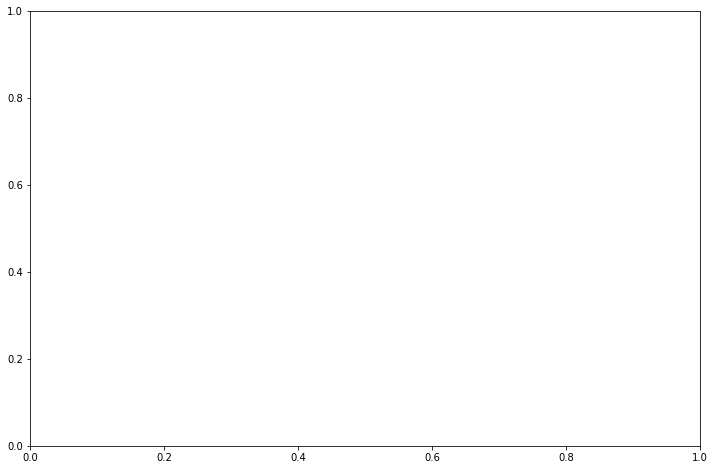

In [7]:
ax = data[:-22].set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Call_fact')
ax.set_xlabel('Date')
plt.show()

Имеется 21 неделя данных, пусть 16 из них будут для тренировки, а оставшиеся 5 для проверки точность предсказаний

In [ ]:
data_train = data[:-27]

In [ ]:
data_train

In [ ]:
clf = Prophet(changepoint_prior_scale = 0.4)
clf.fit(data_train)

In [ ]:
future = clf.make_future_dataframe(periods = 5, freq = 'B')
forecast = clf.predict(future)

In [ ]:
forecast

Подкорретируем съехавшие даты

In [ ]:
from datetime import timedelta

In [ ]:
forecast.loc[[16],['ds']] += timedelta(days = 6)
forecast.loc[[17],['ds']] += timedelta(days = 12)
forecast.loc[[18],['ds']] += timedelta(days = 18)
forecast.loc[[19],['ds']] += timedelta(days = 24)
forecast.loc[[20],['ds']] += timedelta(days = 28)

In [ ]:
clf.plot(forecast)

In [ ]:
clf.plot_components(forecast)

In [ ]:
print(', '.join(forecast.columns))

In [ ]:
data_test = data[:-22]

In [ ]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(data_test.set_index('ds'))

In [ ]:
cmp_df

In [ ]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-5:]['p'])))
print('MAE', np.mean(abs(cmp_df[-5:]['e'])))

Теперь можно обучить модель на всех данных для предсказания результатов, которые не известны. Посмотрим предсказания для последующих 5 недель

In [ ]:
def predict_count(value):
    data = df[['week_start', value]]
    data['week_start'] = pd.to_datetime(data['week_start'])
    data.reset_index()
    data.columns = ['ds', 'y']
    data_predict = data[:-22]
    clf = Prophet(changepoint_prior_scale = 0.4)
    clf.fit(data_predict)
    future = clf.make_future_dataframe(periods = 5, freq = 'B')
    forecast = clf.predict(future)
    forecast.loc[[21],['ds']] += timedelta(days = 6)
    forecast.loc[[22],['ds']] += timedelta(days = 12)
    forecast.loc[[23],['ds']] += timedelta(days = 18)
    forecast.loc[[24],['ds']] += timedelta(days = 24)
    forecast.loc[[25],['ds']] += timedelta(days = 28)
    forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
    return forecast[21:26]

## 	Звонки прогноз

In [ ]:
predict_count('calls_fact')

## Чаты прогноз

In [ ]:
predict_count('chats_fact')

## Бот прогноз

In [ ]:
predict_count('chatbot_fact')

## Люди по прогнозу 1 линия

In [ ]:
predict_count('people_ottok_fact_fl')

## Запросы в бэк план

In [ ]:
predict_count('sr_fact')

## Люди в бэке план по прогнозу

In [ ]:
predict_count('people_back_fact')